In [2]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

In [3]:
## import table from HFHI
mortgagerelief = pd.read_csv('MRData.csv')
mortgagerelief.head(1)

,Affiliate,ID,Loan No,Street Address (ex: 1234 Five Lane),City,State Abbreviation,Zip,Sales Price,Closing Date (mm/yyyy),Term (Months),...,12-month report Financial counseling provided during period of mortgage relief,12-month report Other training/support received from HFH?,12-month report Description of other training received,12-month report Referrals to other agencies,12-month report Describe referral,12-month report Resident Loan number-referenced) currently residing in home?,"12-month report If resident no longer residing in home, please explain",12-month report-additional details on titleholders residing in home,Note,Funds
0,Aitkin County HFH (MN),1,78001567,NaN,Aitkin,MN,56431,"$ 88,800.00",9/27/2013,240.0,...,Yes,No,local banker/mentor,No,NaN,Yes,NaN,NaN,NaN,Thrivent


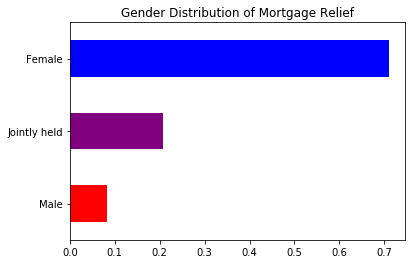

In [5]:
#plot gender data
genders = mortgagerelief['Title Holder Gender'].str.capitalize().value_counts().sort_values()
genders = genders/sum(genders) 
genders.plot.barh(color=['red','purple','blue'])
plt.title('Gender Distribution of Mortgage Relief'); 

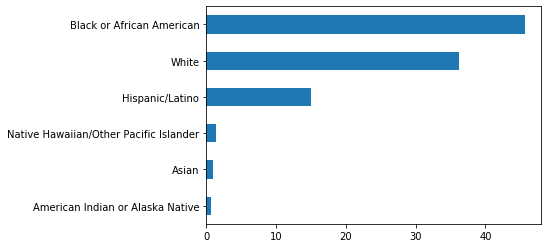

In [60]:
races = mortgagerelief[['Asian: Race/Ethnicity title holders','Black or African American: Race/Ethnicity of title holders','White: Race/Ethnicity of title holders',
       'Native Hawaiian/Other Pacific Islander: Race/Ethnicity of title holders',
       'American Indian or Alaska Native: Race/Ethnicity of title holders',
       'Hispanic/Latino: Race/Ethnicity of title holders',
       "Don't Know or Don't want to Answer: Race/Ethnicity of title holders"]]
races = races.rename(columns={'Asian: Race/Ethnicity title holders': 'Asian', 'Black or African American: Race/Ethnicity of title holders': 'Black or African American', 'White: Race/Ethnicity of title holders':'White',
                             'Native Hawaiian/Other Pacific Islander: Race/Ethnicity of title holders': 'Native Hawaiian/Other Pacific Islander', 'American Indian or Alaska Native: Race/Ethnicity of title holders':'American Indian or Alaska Native',
                             'Hispanic/Latino: Race/Ethnicity of title holders':'Hispanic/Latino', "Don't Know or Don't want to Answer: Race/Ethnicity of title holders": "Don't Know or Don't Want to Answer"})
races = races.fillna('No') 
races = races.replace({'Yes':1,'No':0, 'yes':1, 'no':0, "YES": 1, "NO": 0, " Yes ": 1, "*": 0, "X": 1})
races = races.sum(axis = 0) #add up total number of 
noAnswer = races["Don't Know or Don't Want to Answer"] #number of people who answered no race
races1 = races.drop("Don't Know or Don't Want to Answer") #we're not using data of people who answered no race
races1 = races1 / sum(races1) * 100
races1 = races1.sort_values()
races1.plot.barh()
